In [23]:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
import pandas as pd

# Télécharger les données via les URL
url_ventes = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSawI56WBC64foMT9pKCiY594fBZk9Lyj8_bxfgmq-8ck_jw1Z49qDeMatCWqBxehEVoM6U1zdYx73V/pub?gid=760830694&single=true&output=csv"
url_produits = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSawI56WBC64foMT9pKCiY594fBZk9Lyj8_bxfgmq-8ck_jw1Z49qDeMatCWqBxehEVoM6U1zdYx73V/pub?gid=0&single=true&output=csv"
url_magasins = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSawI56WBC64foMT9pKCiY594fBZk9Lyj8_bxfgmq-8ck_jw1Z49qDeMatCWqBxehEVoM6U1zdYx73V/pub?gid=714623615&single=true&output=csv"

df_ventes = pd.read_csv(url_ventes)
df_produits = pd.read_csv(url_produits)
df_magasins = pd.read_csv(url_magasins)

In [25]:
df_magasins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID Magasin          7 non-null      int64 
 1   Ville               7 non-null      object
 2   Nombre de salariés  7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes


In [26]:
import sqlite3

# Connexion à la base de données
connexion = sqlite3.connect("pme_ventes.db")
curseur = connexion.cursor()

# Création de la table des produits
curseur.execute("""
CREATE TABLE IF NOT EXISTS produits (
    id_ref_produit TEXT PRIMARY KEY,         -- Identifiant du produit
    nom TEXT,                                 -- Nom du produit
    prix REAL,                                -- Prix unitaire
    stock INTEGER                             -- Stock disponible
)
""")

# Création de la table des magasins
curseur.execute("""
CREATE TABLE IF NOT EXISTS magasins (
    id_magasin INTEGER PRIMARY KEY,           -- Identifiant du magasin
    ville TEXT,                               -- Ville où se trouve le magasin
    nb_salaries INTEGER                       -- Nombre de salariés dans le magasin
)
""")

# Création de la table des ventes
curseur.execute("""
CREATE TABLE IF NOT EXISTS ventes (
    date TEXT,                                -- Date de la vente
    id_ref_produit TEXT,                      -- Identifiant du produit vendu
    quantite INTEGER,                         -- Quantité vendue
    id_magasin INTEGER,                       -- Identifiant du magasin où la vente a eu lieu
    PRIMARY KEY (date, id_ref_produit, id_magasin), -- Clé primaire composite
    FOREIGN KEY (id_ref_produit) REFERENCES produits(id_ref_produit),
    FOREIGN KEY (id_magasin) REFERENCES magasins(id_magasin)
)
""")

# Sauvegarde des modifications
connexion.commit()


In [27]:
conn = sqlite3.connect("pme_ventes.db")

In [36]:
#Insertion de la table df_produits
# Recharge les produits en corrigeant les colonnes mal lues
df_produits = pd.read_csv(url_produits)
df_produits.columns = ['nom', 'id_ref_produit', 'prix', 'stock']  # remettre les bons noms
df_produits = df_produits[['id_ref_produit', 'nom', 'prix', 'stock']]  # réorganiser les colonnes


In [37]:
df_produits.to_sql("produits", connexion, if_exists="replace", index=False)

5

In [38]:
pd.read_sql("SELECT * FROM produits", conn)

,id_ref_produit,nom,prix,stock
0,REF001,Produit A,49.99,100
1,REF002,Produit B,19.99,50
2,REF003,Produit C,29.99,75
3,REF004,Produit D,79.99,120
4,REF005,Produit E,39.99,80


In [30]:
#Insertion de la table magasins
# Renommer les colonnes pour correspondre à la base
df_magasins.columns = ["id_magasin", "ville", "nb_salaries"]

# Insérer dans la base
df_magasins.to_sql("magasins", conn, if_exists="replace", index=False)


7

In [31]:
pd.read_sql("SELECT * FROM magasins", conn)

,id_magasin,ville,nb_salaries
0,1,Paris,10
1,2,Marseille,5
2,3,Lyon,8
3,4,Bordeaux,12
4,5,Lille,6
5,6,Nantes,7
6,7,Strasbourg,9


In [32]:
#Insertion de la table ventes
# Renommer les colonnes pour correspondre à la table
df_ventes.columns = ["date", "id_ref_produit", "quantite", "id_magasin"]
# Insérer dans la base
df_ventes.to_sql("ventes", conn, if_exists="replace", index=False)

30

In [33]:
pd.read_sql("SELECT * FROM ventes", conn)

,date,id_ref_produit,quantite,id_magasin
0,2023-05-27,REF001,5,1
1,2023-05-28,REF002,3,2
2,2023-05-29,REF003,2,1
3,2023-05-30,REF004,4,3
4,2023-05-31,REF005,7,2
5,2023-06-01,REF001,3,4
6,2023-06-02,REF002,6,1
7,2023-06-03,REF003,1,5
8,2023-06-04,REF004,2,3
9,2023-06-05,REF005,5,6


In [35]:
print(pd.read_sql("SELECT * FROM produits", connexion).head())
print(pd.read_sql("SELECT * FROM ventes", connexion).head())

  id_ref_produit     nom   prix  stock
0      Produit A  REF001  49.99    100
1      Produit B  REF002  19.99     50
2      Produit C  REF003  29.99     75
3      Produit D  REF004  79.99    120
4      Produit E  REF005  39.99     80
         date id_ref_produit  quantite  id_magasin
0  2023-05-27         REF001         5           1
1  2023-05-28         REF002         3           2
2  2023-05-29         REF003         2           1
3  2023-05-30         REF004         4           3
4  2023-05-31         REF005         7           2


In [39]:
#ANALYSE DES VENTES AVEC SQL
#Chiffre d’affaires total
pd.read_sql("""
SELECT SUM(ventes.quantite * produits.prix) AS chiffre_affaires_total
FROM ventes
JOIN produits ON ventes.id_ref_produit = produits.id_ref_produit
""", connexion)





,chiffre_affaires_total
0,5268.78


In [40]:
#Ventes par produit (top produits)
pd.read_sql("""
SELECT 
    produits.nom AS produit,
    SUM(ventes.quantite) AS total_vendu,
    SUM(ventes.quantite * produits.prix) AS chiffre_affaires
FROM ventes
JOIN produits ON ventes.id_ref_produit = produits.id_ref_produit
GROUP BY produits.nom
ORDER BY chiffre_affaires DESC
""", connexion)



,produit,total_vendu,chiffre_affaires
0,Produit D,21,1679.79
1,Produit E,35,1399.65
2,Produit A,24,1199.76
3,Produit B,27,539.73
4,Produit C,15,449.85


In [51]:
# Chiffre d’affaires par ville (région)
pd.read_sql("""
SELECT 
    magasins.ville,
    SUM(ventes.quantite * produits.prix) AS chiffre_affaires
FROM ventes
JOIN produits ON ventes.id_ref_produit = produits.id_ref_produit
JOIN magasins ON ventes.id_magasin = magasins.id_magasin
GROUP BY magasins.ville
ORDER BY chiffre_affaires DESC
""", connexion)




,ville,chiffre_affaires
0,Lyon,1059.79
1,Marseille,1009.73
2,Bordeaux,829.81
3,Paris,799.80
4,Nantes,739.83
5,Strasbourg,579.89
6,Lille,249.93


In [53]:
# 1. Fusion ventes + produits
df_ventes_produits = df_ventes.merge(df_produits, on="id_ref_produit", how="left")

# 2. Fusion avec magasins
df_complet = df_ventes_produits.merge(df_magasins, on="id_magasin", how="left")

# 3. Création de la colonne chiffre d'affaires
df_complet["chiffre_affaires"] = df_complet["quantite"] * df_complet["prix"]

# 4. Groupement par ville et nom de produit
df_resultat = df_complet.groupby(["ville", "nom"])["chiffre_affaires"].sum().reset_index()

# 5. Tri décroissant
df_resultat = df_resultat.sort_values(by="chiffre_affaires", ascending=False)
df_resultat

,ville,nom,chiffre_affaires
8,Lyon,Produit E,519.87
7,Lyon,Produit D,479.94
14,Nantes,Produit E,439.89
3,Bordeaux,Produit D,399.95
15,Paris,Produit A,399.92
11,Marseille,Produit D,319.96
21,Strasbourg,Produit D,319.96
13,Nantes,Produit A,299.94
12,Marseille,Produit E,279.93
10,Marseille,Produit B,259.87


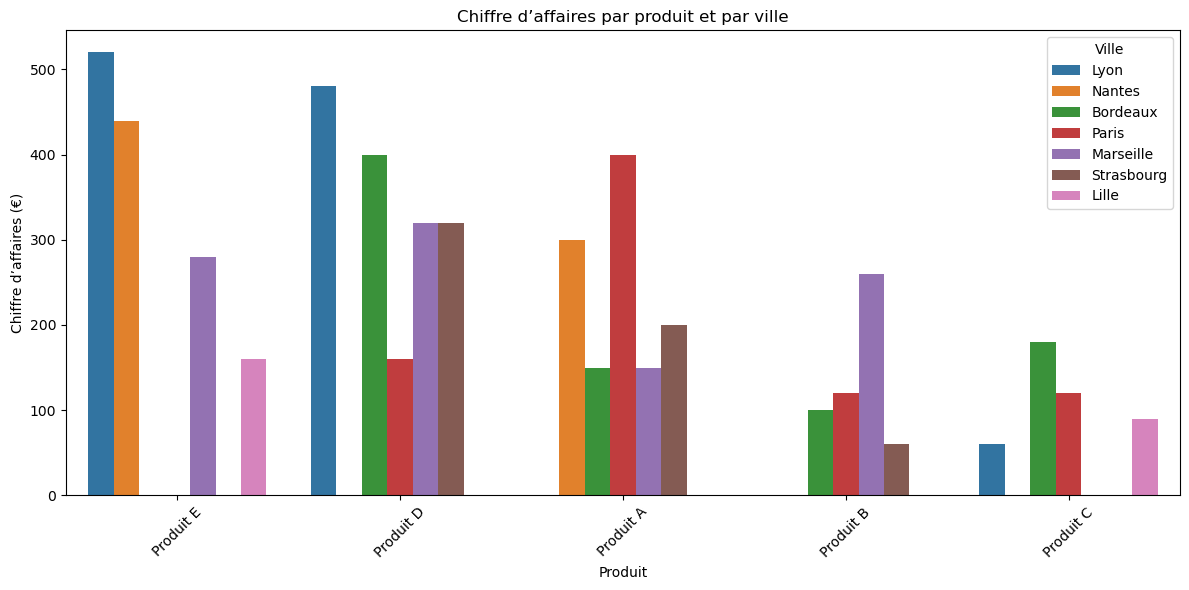

In [54]:
#Produit par ville
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_resultat, x="nom", y="chiffre_affaires", hue="ville")

plt.title("Chiffre d’affaires par produit et par ville")
plt.xlabel("Produit")
plt.ylabel("Chiffre d’affaires (€)")
plt.legend(title="Ville")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


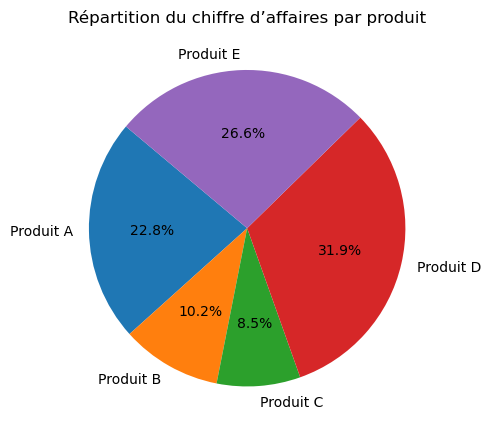

In [62]:
#Camembert du CA total par produit
df_total_par_produit = df_resultat.groupby("nom")["chiffre_affaires"].sum()

plt.figure(figsize=(5, 5))
df_total_par_produit.plot.pie(autopct="%1.1f%%", startangle=140)

plt.title("Répartition du chiffre d’affaires par produit")
plt.ylabel("") 
plt.tight_layout()
plt.show()


C:\Users\Lahbib\AppData\Local\Temp\ipykernel_11476\812930737.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x="nom", y="quantite", palette="viridis")


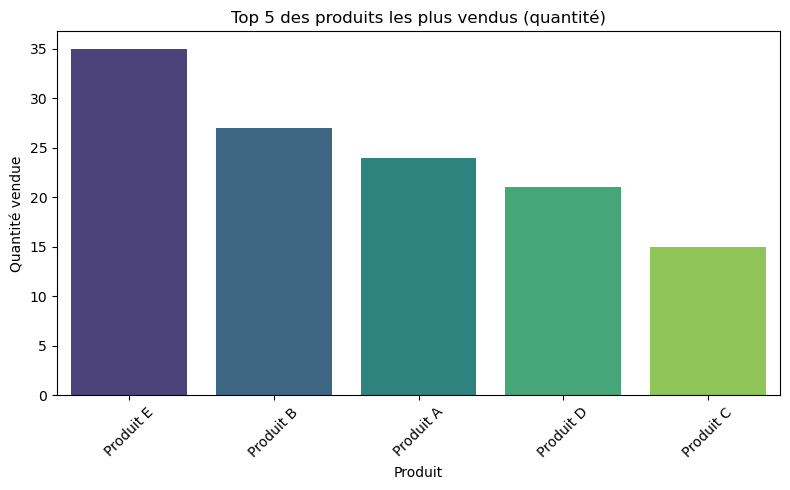

In [60]:
top_5 = df_ventes_produits.groupby("nom")["quantite"].sum().sort_values(ascending=False).head(5).reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=top_5, x="nom", y="quantite", palette="viridis")

plt.title("Top 5 des produits les plus vendus (quantité)")
plt.xlabel("Produit")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:

df_complet.select_dtypes('number')
#Pour faire la mtrice de corrélation :

mat_corr = df_complet.select_dtypes('number').corr()

mat_corr

,quantite,id_magasin,prix,stock,nb_salaries,chiffre_affaires
quantite,1.000000,0.078158,-0.089686,-0.139357,-0.010353,0.599753
id_magasin,0.078158,1.000000,0.039624,0.050281,-0.005407,0.166201
prix,-0.089686,0.039624,1.000000,0.964541,0.136214,0.694264
stock,-0.139357,0.050281,0.964541,1.000000,0.171068,0.654623
nb_salaries,-0.010353,-0.005407,0.136214,0.171068,1.000000,0.076361
chiffre_affaires,0.599753,0.166201,0.694264,0.654623,0.076361,1.000000


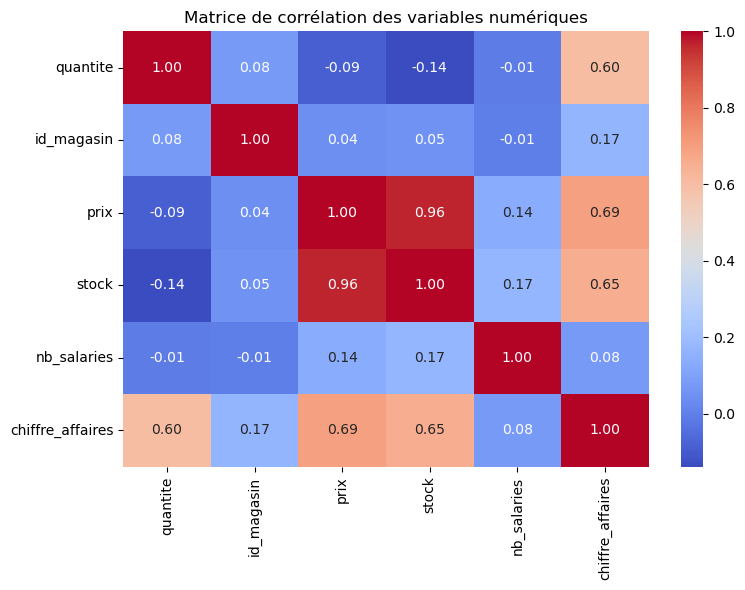

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sélection des colonnes numériques
mat_corr = df_complet.select_dtypes('number').corr()

# 2. Affichage heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()
